In [4]:
import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_csv(r"C:\Users\mahee\Downloads\salary_data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
dataset.shape

(30, 2)

In [36]:
X = dataset.iloc[:,:-1].values # get the input col
# .values to convert the dataframe to numpy array
Y = dataset.iloc[:,-1].values

In [18]:
print("X shape: ",X.shape)
print("Y shape: ", Y.shape)

X shape:  (30, 1)
Y shape:  (30,)


In [37]:
# Defining the training and test sets
from sklearn import model_selection 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 1/3, random_state = 0)

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [32]:
print('Shape of the training data:', X_train.shape)
print('Shape of the testing data:', X_test.shape)

Shape of the training data: (20, 1)
Shape of the testing data: (10, 1)


In [21]:
# Importing the library
from sklearn.linear_model import LinearRegression
#Defining the simple linear regression model
regressor = LinearRegression()

In [22]:
# Training the simple linear regression model
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# The regression coefficient
print('The regression coefficient:', regressor.coef_[0])

The regression coefficient: 9345.942443122374


In [24]:
# The intercept
print('The intercept', regressor.intercept_)

The intercept 26816.192244031176


In [25]:
# The fitted linear regression line
print('The regression line is: y = ', regressor.intercept_, '+', regressor.coef_[0],'*X')

The regression line is: y =  26816.192244031176 + 9345.942443122374 *X


In [44]:
# Making predictions on the test data
y_pred = regressor.predict(X_test)
df = pd.DataFrame(y_pred, columns= ["Salary"])
df["Experience"] = X_test
df

,Salary,Experience
0,40835.105909,1.5
1,123079.399408,10.3
2,65134.556261,4.1
3,63265.367772,3.9
4,115602.645454,9.5
5,108125.891499,8.7
6,116537.239698,9.6
7,64199.962017,4.0
8,76349.687193,5.3
9,100649.137545,7.9


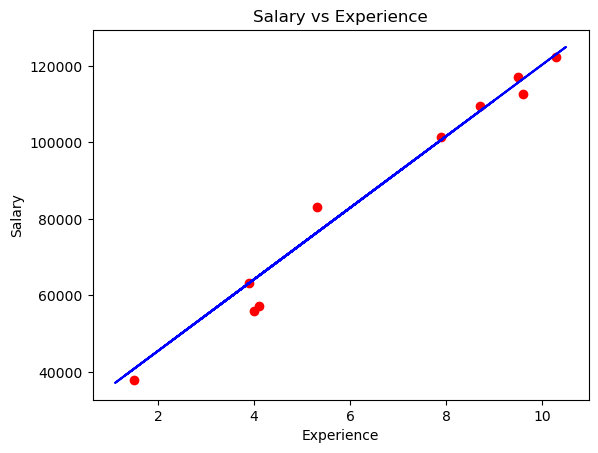

In [27]:
# Visualizing the fitted regression line against the predicted values
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [28]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)

Mean Squared Error is: 21026037.329511303


In [29]:
# Root Mean Squared Error (RMSE)
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)

Root Mean Squared Error is: 4585.415720467589


In [30]:
# R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)

R-Squared is: 0.9749154407708353
